In [2]:
from google.colab import files
uploaded = files.upload()  # this will open a window to upload your file


Saving experiment_data.csv to experiment_data (1).csv


Sample Data:
    user_id    group  converted
0        1  control          0
1        2  control          1
2        3  variant          1
3        4  variant          0
4        5  control          0

Conversion Rates:
 group
control    0.4
variant    0.8
Name: converted, dtype: float64

Z-test Result:
Z-statistic = -1.2910, p-value = 0.1967

95% Confidence Interval for Variant Conversion Rate: (0.3755346297625252, 0.9637758913675698)


/tmp/ipython-input-3-3405628708.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='converted', data=data, ci=95)


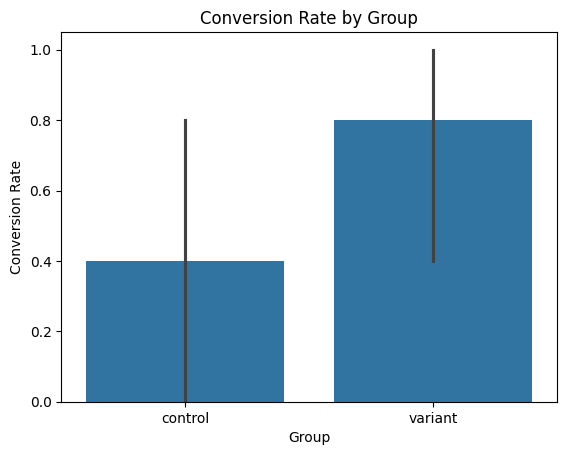

In [3]:
# 📦 Install (only needed once in Colab)
!pip install pandas numpy scipy statsmodels matplotlib seaborn --quiet

# 🧠 Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Load the uploaded CSV file
data = pd.read_csv("experiment_data.csv")
print("Sample Data:\n", data.head())

# 🎯 Conversion rate calculation
conversion_rate = data.groupby("group")["converted"].mean()
print("\nConversion Rates:\n", conversion_rate)

# 🧪 Z-test (Proportion test for conversion rate)
control = data[data["group"] == "control"]["converted"]
variant = data[data["group"] == "variant"]["converted"]

successes = [control.sum(), variant.sum()]
samples = [len(control), len(variant)]

z_stat, p_val = proportions_ztest(successes, samples)
print(f"\nZ-test Result:\nZ-statistic = {z_stat:.4f}, p-value = {p_val:.4f}")

# ✅ Confidence interval for variant group
ci = sm.stats.proportion_confint(successes[1], samples[1], alpha=0.05, method='wilson')
print(f"\n95% Confidence Interval for Variant Conversion Rate: {ci}")

# 📈 Visualization
sns.barplot(x='group', y='converted', data=data, ci=95)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()
